In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
image_path = '/content/drive/MyDrive/Large vision/YOLO_model/images.jpeg'

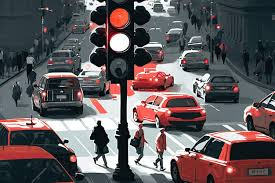

In [5]:
from PIL import Image


image = Image.open(image_path)
image

In [10]:
import torch
from transformers import YolosFeatureExtractor, YolosForObjectDetection
import matplotlib.pyplot as plt
import matplotlib.patches as patches  # to create boxes

In [11]:
model_name = 'hustvl/yolos-small'
feature_extractor = YolosFeatureExtractor.from_pretrained(model_name)
model = YolosForObjectDetection.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/292 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/yolos/feature_extraction_yolos.py:38: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/123M [00:00<?, ?B/s]

In [19]:
from torchvision.ops import nms ##torchvision to process imags and videos  # nms : none maximum supersion ===> to filter all boies of same object and disply te once which max. prob.

In [17]:
def object_detection(image_path, confidence_threshold = 0.8, iou_threshold=0.5):  #  iou_threshold ==> used in nms لمسح الصنادق المتداخلة
  image = Image.open(image_path)
  inputs = feature_extractor(images = image, return_tensors= 'pt')

  outputs = model(**inputs) ## row data
  logits = outputs.logits
  bounding_boxes = outputs.pred_boxes

  target_sizes = torch.tensor([image.size[::-1]])  ## to select image size as (higt, width)
  results = feature_extractor.post_process_object_detection(outputs, target_sizes=target_sizes)[0] ## to convert row data to processed data you can use
  # print(results)

  scores = results['scores'] # confidence scores for each class
  labels = results['labels'] #  each className label
  boxes = results['boxes'] #  Boxes locations [minX, minY, maxX, maxY]

  keep = scores > confidence_threshold
  scores = scores[keep]
  labels = labels[keep]
  boxes =boxes[keep]

  keep_indices = nms(boxes, scores, iou_threshold)
  scores = scores[keep_indices]
  labels = labels[keep_indices]
  boxes =boxes[keep_indices]

  fig, ax = plt.subplots(1)
  ax.imshow(image)

  for score, label, box in zip(scores, labels, boxes):
    box = [round(i, 2) for i in box.tolist()]
    xmin, ymin, xmax, ymax = box
    width, height = xmax - xmin, ymax - ymin

    rect = patches.Rectangle((xmin, ymin), width, height, linewidth = 2, edgecolor = 'r', facecolor = 'none')
    ax.add_patch(rect)

    label_text = f'{model.config.id2label[label.item()]}: {round(score.item(), 2)}'
    ax.text(xmin, ymin - 10,label_text, color = 'red', fontsize =9,bbox =dict(facecolor = 'yellow', alpha = 0.5) )
  ax.axis('off')



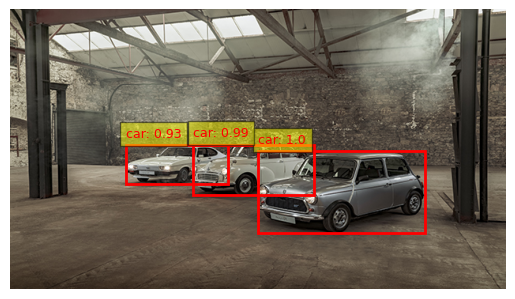

In [22]:
image_path = '/content/drive/MyDrive/Large vision/YOLO_model/cars.jpg'
object_detection(image_path, confidence_threshold = 0.8, iou_threshold=0.5)

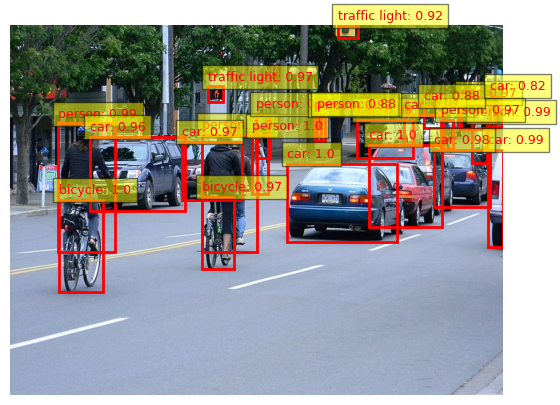

In [21]:
image_path = '/content/drive/MyDrive/Large vision/YOLO_model/street.jpg'
object_detection(image_path, confidence_threshold = 0.8, iou_threshold=0.5)

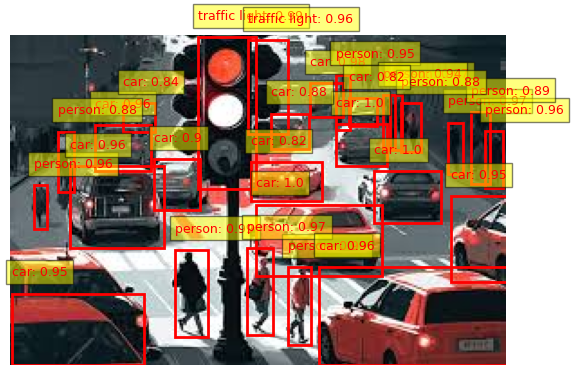

In [20]:
image_path = '/content/drive/MyDrive/Large vision/YOLO_model/images.jpeg'
object_detection(image_path, confidence_threshold = 0.8, iou_threshold=0.5)

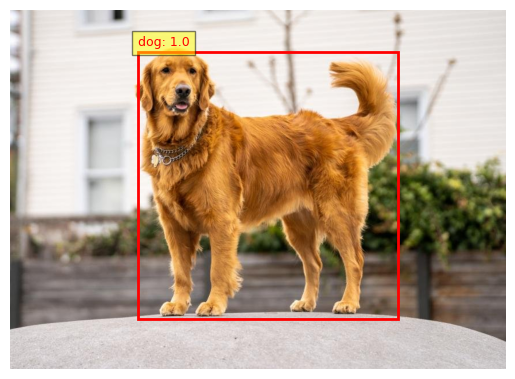

In [23]:
image_path = '/content/drive/MyDrive/Large vision/VIT_model/dog1.jpeg'
object_detection(image_path, confidence_threshold = 0.8, iou_threshold=0.5)

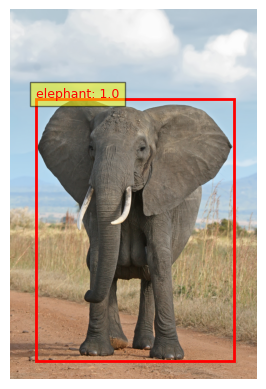

In [28]:
image_path = '/content/drive/MyDrive/Large vision/CLIP_MODEL_ImageSearch/images/elephant1.jpg'
object_detection(image_path, confidence_threshold = 0.8, iou_threshold=0.5)